0.00	0.00	images/002.jpg
('Total ', 3698, ' characters are found.')
0.47	0.47	got characters


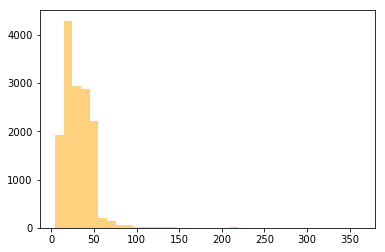

Total 14792 all NNs
('average NN distance: ', 31.05247117198959)


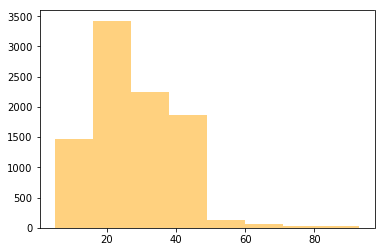

Total 9250 hor NNs
Distance peaks: [16, 27, 38, 5, 49, 60, 71, 82]
average NN horizontal distance: 27.86



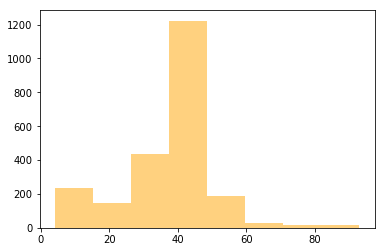

Total 2293 ver NNs
Distance peaks: [37, 26, 4, 48, 15, 59, 81, 70]
average NN vertical distance: 39.01

4.16	3.69	got words & tuples
Total 622 words are found.


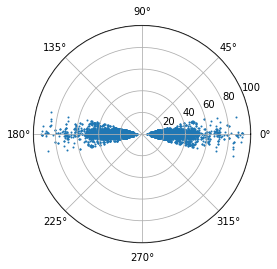

5.01	0.85	built Docstrum
5.09	0.08	finished analysing page
average time: 4.79

Done.


In [2]:
#!/usr/bin/python
# find . -name '.DS_Store' -type f -delete
# Chulwoo Pack

import sys
import os
from page import Page
import matplotlib.pyplot as plt

SHOW_STEPS = True    # change this to false if you just want to see the final output for each page.
SAVE_OUTPUT = True
SAVE_DOCSTRUM = True

inputFolder = os.path.join('images')
outputFolder = os.path.join('output')

    
inputPath = os.path.join(inputFolder, os.listdir(inputFolder)[0])
outputPath = os.path.join(outputFolder, os.listdir(inputFolder)[0])

#page = Page(inputPath, SHOW_STEPS, SAVE_DOCSTRUM)
page = Page(inputPath, SHOW_STEPS)
    
if SAVE_OUTPUT:
    page.save(outputPath)  # save a copy of what is displayed. Used for getting images for the paper.
    
page.show((800, 800))

0.00	0.00	images/002.jpg
('Total ', 3698, ' characters are found.')
0.46	0.46	got characters


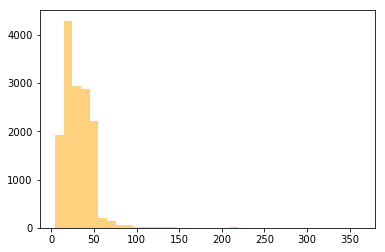

Total 14792 all NNs
('average NN distance: ', 31.05247117198959)


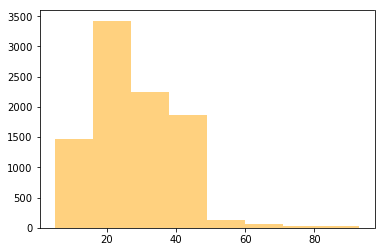

Total 9250 hor NNs
Distance peaks: [16, 27, 38, 5, 49, 60, 71, 82]
average NN horizontal distance: 27.86



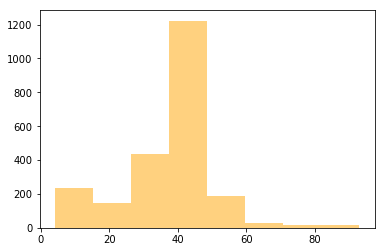

Total 2293 ver NNs
Distance peaks: [37, 26, 4, 48, 15, 59, 81, 70]
average NN vertical distance: 39.01

4.39	3.93	got words & tuples
Total 622 words are found.


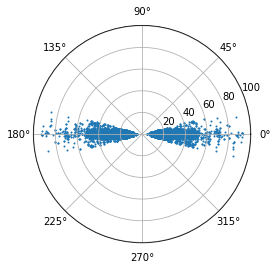

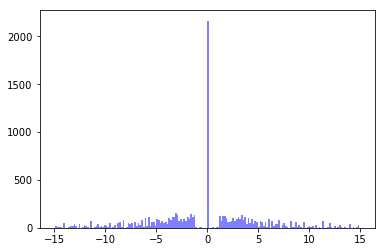

5.44	1.04	built Docstrum
5.50	0.06	finished analysing page
average time: 5.13

Done.


In [4]:
# LINE EXTRACTION TESTING

import sys
import os
from page import Page

import cv2
import math
import numpy
import subprocess
import os

import colors
import geometry as g
from box import Box
import text
from dimension import Dimension
from stopwatch import Stopwatch
import numpy
import matplotlib.pyplot as plt
import ntpath


SHOW_STEPS = True    # change this to false if you just want to see the final output for each page.
SAVE_OUTPUT = True
SAVE_DOCSTRUM = False

inputFolder = os.path.join('images')
outputFolder = os.path.join('output')

    
inputPath = os.path.join(inputFolder, os.listdir(inputFolder)[0])
outputPath = os.path.join(outputFolder, os.listdir(inputFolder)[0])

page = Page(inputPath, SHOW_STEPS, SAVE_DOCSTRUM)


if True:
    page.save(outputPath)  # save a copy of what is displayed. Used for getting images for the paper.
    
page.show((800, 800))

In [5]:
print("%.2f" %1.237)

1.24


In [6]:
for line in page.lines:
    line.group = None

for line in page.lines:
    print(line.group)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [7]:
#NER VERSION: ADJUSTIVE SEARCHING ORDER
import cv2
import math
from shapely.geometry import Point            # For checking overlap
from shapely.geometry.polygon import Polygon  # For checking overlap
from shapely.geometry import MultiPoint       # For checking overlap

import progressbar      # For displaying progressbar
from time import sleep  # For displaying progressbar

#from stopwatch import Stopwatch   # For checking run-time

#stopwatch = Stopwatch()

image = page.image.copy()

EPS = 1e-10
group_idx = 0
threshold_angle = 1.0
threshold_paralldist = 1.7 * 13.0
threshold_perpendist = 1.7 * 17.0 #[1.5~1.7]
threshold_overlap    = 1.0
threshold_early_skip = 100
threshold_visualize_line_width = 5

SHOW_DETAIL      = False
SHOW_VISUAL_STEP = True
EARLY_SKIP       = False

########
# INIT #
########
# Get lines
_my_lines  = page.lines
# Remove dots
my_lines = []
for _my_line in _my_lines:
    if(_my_line.start.x-_my_line.end.x==0 and _my_line.start.y-_my_line.end.y==0):
        continue
    else:
        my_lines.append(_my_line)
# Sorting lines
my_lines.sort(key=lambda line:((line.start.y+line.end.y)/2,(line.start.x+line.end.x)/2))
# Lines assigned a group
my_lines_in_group = []
# Lines not assigned any group yet
my_lines_no_group = []
for i in range(0,len(my_lines)-1):
    my_lines_no_group.append(i)
if SHOW_DETAIL: print("no_group:",my_lines_in_group)
if SHOW_DETAIL: print("in_group:",my_lines_no_group)
# First line, not dot (its index, i)

bar = progressbar.ProgressBar(maxval=len(my_lines_no_group), \
            widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
progress_idx = 0
bar.start()

max_loop = len(my_lines)
#act_loop = 0

for act_loop in xrange(max_loop): # Make sure looked up every lines   
    #flag_found_none = True
    if ((len(my_lines_in_group) == 0) and (len(my_lines_no_group) == 0)):
        break
    #test_act_loop = test_act_loop+1
    
    progress_idx = progress_idx+2 # Update progressbar
    bar.update(act_loop)      # Update progressbar
    sleep(0.1)    
    #######################
    # Set the ith element #
    #######################
    i = -1
    if EARLY_SKIP:
        early_skip = threshold_early_skip
    ## TODO: Since, currently there is no lines in my_lines_in_group queue and lines are remained, find another line as ith element in my_lines_no_group queue with excluding dots. 
    if(len(my_lines_in_group) == 0):
        delta_x_i = 0
        delta_y_i = 0
        for candidate_line_idx in my_lines_no_group[:]:
            x_O_i = my_lines[candidate_line_idx].start.x
            y_O_i = page.image.shape[0] - my_lines[candidate_line_idx].start.y
            x_F_i = my_lines[candidate_line_idx].end.x
            y_F_i = page.image.shape[0] - my_lines[candidate_line_idx].end.y 
            #delta_x_i = abs(x_F_i - x_O_i)
            delta_x_i = float(x_F_i - x_O_i)
            #delta_y_i = abs(y_F_i - y_O_i)
            delta_y_i = float(y_F_i - y_O_i)
            if (delta_x_i != 0 and delta_y_i != 0): # Found!
                i = candidate_line_idx
                my_lines_no_group.remove(candidate_line_idx)
                break
    else:
        i = my_lines_in_group.pop(0)
        
    
    # TODO: more sophisticated way to break?
    if (i == -1):
        break
    
    # Visualize ith element
    if SHOW_VISUAL_STEP:
        image = page.image.copy()
        cv2.line(image, ((my_lines[i].start.x,my_lines[i].start.y)),((my_lines[i].end.x,my_lines[i].end.y)), (0,0,255),threshold_visualize_line_width)
        page.display(image, title='Visualization of text-line groupping step')
                                                       
    # No more lines to search
    if (len(my_lines_no_group) == 0):
        break
    else:
        my_lines[i].noise = False  # This assure that dot-wise noise to be excluded from grouping process
        #######################
        # Set the jth element #
        #######################
        for j in my_lines_no_group[:]:
            if EARLY_SKIP:
                if early_skip < 0:
                    break
            if SHOW_VISUAL_STEP:
                cv2.line(image, ((my_lines[j].start.x,my_lines[j].start.y)),((my_lines[j].end.x,my_lines[j].end.y)), (255,0,0),threshold_visualize_line_width)
                page.display(image, title='Visualization of text-line groupping step')

            sameGroup = False
            ################################
            # CALCULATE GEOMETRIC FEATURES #
            ################################
            # Point setting
            x_O_i = my_lines[i].start.x
            y_O_i = page.image.shape[0] - my_lines[i].start.y
            x_F_i = my_lines[i].end.x
            y_F_i = page.image.shape[0] - my_lines[i].end.y 

            x_O_j = my_lines[j].start.x
            y_O_j = page.image.shape[0] - my_lines[j].start.y
            x_F_j = my_lines[j].end.x
            y_F_j = page.image.shape[0] - my_lines[j].end.y

            #delta_x_i = abs(x_F_i - x_O_i)
            #delta_y_i = abs(y_F_i - y_O_i)
            #delta_x_j = abs(x_F_j - x_O_j)
            #delta_y_j = abs(y_F_j - y_O_j)
            delta_x_i = float(x_F_i - x_O_i)
            delta_y_i = float(y_F_i - y_O_i)
            delta_x_j = float(x_F_j - x_O_j)
            delta_y_j = float(y_F_j - y_O_j)
            
            
            # ith or jth line is dot, so skip it
            if (delta_x_j == 0 and delta_y_j == 0):
                my_lines_no_group.remove(j)
                continue

            if SHOW_DETAIL:
                print("\n****************************************************************")
                print("# of in_group:",len(my_lines_in_group),my_lines_in_group)
                print("# of no_group:",len(my_lines_no_group),my_lines_no_group)
                print(i, my_lines[i].points)
                print(j, my_lines[j].points)
                print("i:",x_O_i,y_O_i,"-",x_F_i,y_F_i)
                print("j:",x_O_j,y_O_j,"-",x_F_j,y_F_j)

            # Calculate angle
            theta_i_j = math.atan2(delta_y_j,delta_x_j-math.atan2(delta_y_i,delta_x_i))
            if SHOW_DETAIL:
                print("Angle:",theta_i_j)

            # Calculate overlap
            #if delta_x_j == 0:
            #    delta_x_j = 0.1
            #if delta_y_i == 0:
            #    delta_y_i = 0.1
            #if delta_y_j == 0:
            #    delta_y_j = 0.1
            #if delta_x_i == 0:
            #    delta_x_i = 0.1


            x_A_j = (x_O_i*delta_x_i*delta_x_j + x_O_j*delta_y_i*delta_y_j + delta_x_j*delta_y_i*(y_O_i-y_O_j))/(delta_y_i*delta_y_j + delta_x_i*delta_x_j + EPS)
            if (delta_x_j != 0):
                y_A_j = (delta_y_j/delta_x_j)*(x_A_j - x_O_j) + y_O_j
            else:
                x_A_j = y_O_j

            x_B_j = (x_F_i*delta_x_i*delta_x_j + x_F_j*delta_y_i*delta_y_j + delta_x_j*delta_y_i*(y_F_i-y_F_j))/(delta_y_i*delta_y_j + delta_x_i*delta_x_j + EPS)
            if (delta_x_j != 0):
                y_B_j = (delta_y_j/delta_x_j)*(x_B_j - x_F_j) + y_F_j
            else:
                x_B_j = y_F_j

            # Find C and D ponts
            #x_middle_candidates = [x_O_j, x_F_j, x_A_j, x_B_j]
            #x_middle_candidates.sort()
            #y_middle_candidates = [y_O_j, y_F_j, y_A_j, y_B_j]
            #y_middle_candidates.sort()
            C_D_candidates = [(x_O_j,y_O_j), (x_F_j,y_F_j), (x_A_j,y_A_j), (x_B_j,y_B_j)]
            if (delta_x_j != 0):
                C_D_candidates.sort(key=lambda x:x[0]) # sort by x
            elif (delta_y_j != 0):
                C_D_candidates.sort(key=lambda x:x[1]) # sort by y
            x_C_j,y_C_j = C_D_candidates[1]
            x_D_j,y_D_j = C_D_candidates[2]

            if SHOW_DETAIL:
                print("x_A_j,y_A_j",x_A_j,y_A_j)
                print("x_B_j,y_B_j",x_B_j,y_B_j)
                print("x_C_j,y_C_j",x_C_j,y_C_j)
                print("x_D_j,y_D_j",x_D_j,y_D_j)

            #x_i_j_components = [int(x_O_i), int(x_F_i), int(x_O_j), int(x_F_j)]
            #x_i_j_components.sort()
            #y_i_j_components = [int(y_O_i), int(y_F_i), int(y_O_j), int(y_F_j)]
            #y_i_j_components.sort()
            # convert to int in order to allow generous overlap
            #if ((int(x_O_j) <= int(x_C_j) <= int(x_F_j) and (int(y_O_j) <= int(y_C_j) <= int(y_F_j) or int(y_F_j) <= int(y_C_j) <= int(y_O_j))) or (int(x_O_i) <= int(x_C_j) <= int(x_F_i) and (int(y_O_i) <= int(x_C_j) <= int(y_F_i) or int(y_F_i) <= int(y_C_j) <= int(y_O_i)))) and ((int(x_O_j) <= int(x_D_j) <= int(x_F_j) and (int(y_O_j) <= int(y_D_j) <= int(y_F_j) or int(y_F_j) <= int(y_D_j) <= int(y_O_j))) or (int(x_O_i) <= int(x_D_j) <= int(x_F_i) and (int(y_O_i) <= int(y_D_j) <= int(y_F_i) or int(y_F_i) <= int(y_D_j) <= int(y_O_i)))):
            #if ((x_i_j_components[0] <= int(x_C_j[0]) <= x_i_j_components[-1]) and (y_i_j_components[0] <= int(y_C_j) <= y_i_j_components[-1]) and (x_i_j_components[0] <= int(x_D_j) <= x_i_j_components[-1]) and (y_i_j_components[0] <= int(y_D_j) <= y_i_j_components[-1])):
            #convex_hull = MultiPoint([(x_O_j, y_O_j), (x_O_j, y_F_j), (x_F_j, y_F_j), (x_F_j, y_O_j)])
            #polygon = Polygon([(x_O_i, y_O_i), (x_F_i, y_F_i),(x_F_j, y_F_j), (x_O_j, y_O_j)])
            #convex_hull = MultiPoint([(x_O_i, y_O_i), (x_F_i, y_F_i),(x_F_j, y_F_j), (x_O_j, y_O_j)]).convex_hull
            polygon = Polygon([(x_O_j, y_O_j), (x_O_j, y_F_j), (x_F_j, y_F_j), (x_F_j, y_O_j)])
            C_point = Point(x_C_j, y_C_j)
            D_point = Point(x_D_j, y_D_j)
            #if polygon.area != convex_hull.area:
            #    overlap = False
            #elif (convex_hull.contains(C_point) and convex_hull.contains(D_point)):
            #if (convex_hull.contains(C_point) and convex_hull.contains(D_point)):
            if (polygon.contains(C_point) or polygon.touches(C_point)) and (polygon.contains(D_point) or polygon.touches(D_point)):
                overlap = True
            else:
                overlap = False
            
            #p_j = (math.sqrt(math.pow(y_D_j-y_C_j,2)+math.pow(x_D_j-x_C_j,2)))/2.0
            p_j = math.sqrt(math.pow(y_D_j-y_C_j,2)+math.pow(x_D_j-x_C_j,2))
            l_j = math.sqrt(math.pow(y_F_j-y_O_j,2)+math.pow(x_F_j-x_O_j,2))
            if (l_j == 0):
                l_j = 0.1
            if overlap:
                p_i_j = p_j/l_j
            else:
                p_i_j = -p_j/l_j

            if SHOW_DETAIL:
                print("Overlap?",overlap)
                print("p_j:",p_j)
                print("p_i_j:",p_i_j)

            # Calculate parallel_dist
            if overlap:
                d_i_j_a = p_j
            else:
                d_i_j_a = -p_j
            if SHOW_DETAIL:
                print("parallel_dist: ",d_i_j_a)

            # Calculate perpend_dist
            x_M_j = (x_C_j + x_D_j)/2.0
            y_M_j = (y_C_j + y_D_j)/2.0
            if SHOW_DETAIL:
                print("x_M_j,y_M_j",x_M_j,y_M_j)
                print("delta_x_i:",delta_x_i)
                print("delta_y_i:",delta_y_i)
                print("delta_x_j:",delta_x_j)
                print("delta_y_j:",delta_y_j)

            if delta_x_i != 0.0 and delta_y_i != 0.0:
                d_e_i_j = ((x_M_j - x_O_i) - (y_M_j - y_O_i)*delta_x_i/(delta_y_i + EPS))/((delta_x_i**2)/(delta_y_i**2 + EPS) + 1)**0.5 
            elif delta_y_i == 0.0:
                d_e_i_j = int(y_M_j) - int(y_O_i)
            elif delta_x_i == 0.0:
                d_e_i_j = int(x_M_j) - int(x_O_i)
            d_e_i_j = abs(d_e_i_j)

            if SHOW_DETAIL:
                print("perpend_dist: ",d_e_i_j)

            ######################
            # DECIDING GROUPNESS #
            #######################
            # 1. angle check
            if theta_i_j < threshold_angle:
                if SHOW_DETAIL: print("... Angle ok!")
            # 2. perpend_dist check
                if 0 < d_e_i_j < threshold_perpendist:
                    if SHOW_DETAIL: print("... Perpendicular ok!")
            # 3.a. overlap check
            # 3.b. parallel_dist check
                    if ((overlap and p_i_j <= threshold_overlap)):
                        if SHOW_DETAIL: print("... Overlap & p_i_j ok!")
                        # Group!
                        sameGroup = True
                    elif (abs(d_i_j_a) < threshold_paralldist):
                        if SHOW_DETAIL: print("... Parallel ok!")
                        # Group!
                        sameGroup = True

            if SHOW_DETAIL:
                print("same group? ",sameGroup)
            if sameGroup:

                if EARLY_SKIP:
                    early_skip = threshold_early_skip
                if SHOW_DETAIL:
                    print("before group idx: ",group_idx)
                    print("before i's group: ", my_lines[i].group)
                    print("before j's group: ", my_lines[j].group)
                if (my_lines[i].group == None) and (my_lines[j].group == None):
                    if SHOW_DETAIL:
                        print("... case 1")
                    # Assign to a new block
                    group_idx = group_idx + 1
                    my_lines[i].group = group_idx
                    my_lines[j].group = group_idx
                    #my_lines_no_group.remove(i)     # update queue
                    my_lines_in_group.append(i)     # update queue
                    my_lines_no_group.remove(j)     # update queue
                    my_lines_in_group.append(j)     # update queue
                elif (my_lines[i].group == None):
                    if SHOW_DETAIL: print("... case 2")
                    # Unassigned text-line is assigned to the block of the other
                    my_lines[i].group = my_lines[j].group
                    #my_lines_no_group.remove(i)     # update queue
                    my_lines_in_group.append(i)     # update queue
                elif (my_lines[j].group == None):
                    if SHOW_DETAIL: print("... case 3")
                    # Unassigned text-line is assigned to the block of the other
                    my_lines[j].group = my_lines[i].group
                    my_lines_no_group.remove(j)     # update queue
                    my_lines_in_group.append(j)     # update queue
                if SHOW_DETAIL: print("after group idx: ",group_idx)
                if SHOW_DETAIL: print("after i's group: ", my_lines[i].group)
                if SHOW_DETAIL: print("after j's group: ", my_lines[j].group)
                if SHOW_VISUAL_STEP:
                    cv2.line(image, ((my_lines[j].start.x,my_lines[j].start.y)),((my_lines[j].end.x,my_lines[j].end.y)), (0,255,0),threshold_visualize_line_width)
                    page.display(image, title='Visualization of text-line groupping step')
            else:
                if EARLY_SKIP:
                    early_skip = early_skip - 1
            
        if (my_lines[i].noise == False and my_lines[i].group == None):
            group_idx = group_idx + 1
            my_lines[i].group = group_idx
bar.finish()

print("Total iter: [%d/%d]" %(act_loop,max_loop))
print("Done!")

Total iter: [239/274]
Done!


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 6. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 6. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 6. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[6. 4. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[10.         10.97560976 11.95121951 12.92682927 13.90243902 14.87804878
 15.85365854 16.82926829 17.80487805 18.7804878  19.75609756 20.73170732
 21.70731707 22.68292683 23.65853659 24.63414634 25.6097561  26.58536585
 27.56097561 28.53658537 29.51219512 30.48780488 31.46341463 32.43902439
 33.41463415 34.3902439  35.36585366 36.34146341 37.31707317 38.29268293
 39.26829268 40.24390244 41.2195122  42.19512195 43.17073171 44.14634146
 45.12195122 46.09756098 47.07317073 48.04878049 49.024390

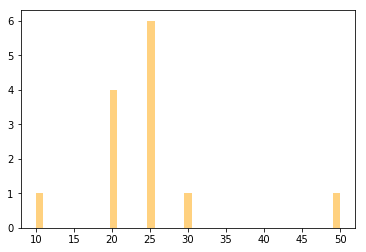

In [8]:

dist = [10,20,20,50,20,20,30,25,25,25,25,25,25]
n, bins, patches = plt.hist(dist, numpy.max(dist)-numpy.min(dist)+1, facecolor='orange', alpha=0.5)
n_copy = n.copy()
print(n)
print(n_copy)
n_copy[::-1].sort()
print(n)
print(n_copy)
print(bins)
print(numpy.argmax(n)+numpy.min(dist))
print(bins.max())

#n_copy[::-1].sort()
a = numpy.where(n == n_copy[2])
print("Test",a)

if len(a[0])>1:
    _max = a[0][int(len(a[0])/2)]
else:
    _max = a[0][0]

_max+numpy.min(dist)

for i in range(5):
    print(i)

In [9]:
x_O_i = 491
y_O_i = 615
x_F_i = 757
y_F_i = 600
x_O_j = 491
y_O_j = 615
x_F_j = 757
y_F_j = 600
x_C_j = 757
y_C_j = int(637.6500942238861)

delta_y_j = 7.0
delta_x_j = 658.0
x_A_j = 4144.4503916449075
x_F_j = 3890.0
y_F_j = 1856.0
(delta_y_j/delta_x_j)*(x_A_j - x_F_j) + y_F_j


1858.7069190600523

In [10]:
('i:', 2639, 4875, '-', 2676, 4872)
('j:', 992, 4892, '-', 2222, 4879)
('Angle:', -0.010568017106413556)
('x_A_j,y_A_j', 2638.9670025686564, 4874.593031680169)
('x_B_j,y_B_j', 2676.178357373372, 4874.19974093833)
('x_C_j,y_C_j', 2222, 4879)
('x_D_j,y_D_j', 2638.9670025686564, 4874.593031680169)

x_O_i = 2639
y_O_i = 4875
x_F_i = 2676
y_F_i = 4872

x_O_j = 896
y_O_j = 4802
x_F_j = 1415
y_F_j = 4805

x_C_j = 2222
y_C_j = 4879
x_D_j = 2638#.9670025686564
y_D_j = 4874#.593031680169


#polygon = Polygon([(x_O_i-1, y_O_i+1), (x_F_i+1, y_F_i+1),(x_F_j+1, y_F_j-1), (x_O_j-1, y_O_j-1)])
polygon = Polygon([(x_O_i, y_O_i), (x_F_i, y_F_i),(x_F_j, y_F_j), (x_O_j, y_O_j)])
#C_point = Point(x_C_j, y_C_j)
#D_point = Point(x_D_j, y_D_j)
polygon.area

19460.0

In [11]:
from shapely.geometry import MultiPoint
convex_hull = MultiPoint([(x_O_i, y_O_i), (x_F_i, y_F_i),(x_F_j, y_F_j), (x_O_j, y_O_j)]).convex_hull
convex_hull.area

19460.0

In [12]:
x_O_j = 2476
y_O_j = 1938
x_F_j = 2840
y_F_j = 1932
x_A_j = 2363
y_A_j = 1939
x_B_j = 2631
y_B_j = 1935

C_D_candidates = [(x_O_j,y_O_j), (x_F_j,y_F_j), (x_A_j,y_A_j), (x_B_j,y_B_j)]
C_D_candidates.sort(key=lambda x:x[0])
print(C_D_candidates[1])
print(C_D_candidates[2])


(2476, 1938)
(2631, 1935)


In [13]:
C_D_candidates

[(2363, 1939), (2476, 1938), (2631, 1935), (2840, 1932)]

In [14]:
C_D_candidates

[(2363, 1939), (2476, 1938), (2631, 1935), (2840, 1932)]

In [15]:
C_x,C_y = C_D_candidates[1]
print(C_x)
print(C_y)


2476
1938


In [16]:
Polygon([(0-1, y_O_i+1), (x_F_i+1, y_F_i+1),(x_F_j+1, y_F_j-1), (x_O_j-1, y_O_j-1)])

In [18]:
######################
# Draw Grouped Lines #
######################
import cv2
image = page.image.copy()
for my_line in my_lines:
    #print(my_line.start.x)
#    print my_line.group
    if my_line.group == None:
        continue
        blue  = 0
        green = 0 
        red   = 0
    else:
        blue = (my_line.group*100)%255
        green = (my_line.group*200)%255
        red = (my_line.group*300)%255
        
    #print(blue,green,red)
    cv2.line(image, (my_line.start.x,my_line.start.y), (my_line.end.x,my_line.end.y), (blue,green,red),10)
    
#cv2.imwrite(outputPath, image) 
maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.imwrite("draw_lines.png", image)
#cv2.namedWindow('title', cv2.CV_WINDOW_AUTOSIZE)
#cv2.imshow('grouped', image)
#cv2.waitKey()
#cv2.destroyAllWindows()

True

In [20]:
#######################
# Draw Bounding Boxes #
#######################
import cv2
import numpy
THRESHOLD_POLY_EXAGGERATE = 10 # Unit: Pixel
image = page.image.copy()
tot_groups = group_idx+1
group_table = []
for group_idx in range(tot_groups):
    group_table.append([])

for my_line in my_lines:
    for group_idx in range(1,tot_groups):
        if my_line.group == None:
            continue
        elif my_line.group == group_idx:
            exaggerated_left_start_x   = my_line.start.x-THRESHOLD_POLY_EXAGGERATE
            exaggerated_up_start_y     = my_line.start.y+THRESHOLD_POLY_EXAGGERATE
            exaggerated_down_start_y   = my_line.start.y-THRESHOLD_POLY_EXAGGERATE
            
            exaggerated_right_end_x    = my_line.end.x+THRESHOLD_POLY_EXAGGERATE
            exaggerated_up_end_y       = my_line.end.y+THRESHOLD_POLY_EXAGGERATE
            exaggerated_down_end_y     = my_line.end.y-THRESHOLD_POLY_EXAGGERATE
            
            group_table[group_idx-1].append([exaggerated_left_start_x,exaggerated_up_start_y])
            group_table[group_idx-1].append([exaggerated_left_start_x,exaggerated_down_start_y])
            
            group_table[group_idx-1].append([exaggerated_right_end_x,exaggerated_up_end_y])
            group_table[group_idx-1].append([exaggerated_right_end_x,exaggerated_down_end_y])
            
            

for group_idx in range(1,tot_groups):
    points = numpy.array(group_table[group_idx-1], dtype='int')
    rect = cv2.minAreaRect(points)
    box = cv2.boxPoints(rect) 
    box = numpy.int0(box)
    cv2.drawContours(image,numpy.int32([box]),0,(0,0,255),7)
    #convex_hull = cv2.convexHull(points)
    #cv2.polylines(image, numpy.int32([convex_hull]), True, (0, 0, 255), thickness=2)


maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.imwrite("draw_boxes.png", image)

True

In [ ]:
cv2.imwrite(outputPath, image)

In [ ]:
group_table

In [ ]:
cv2.imwrite(outputPath, image)

In [22]:
################################
# Draw BoundingBox (Rectangle) #
################################
import cv2
import numpy
image = page.image.copy()
boundingbox_table = numpy.zeros((group_idx+1,4))  # [min_x,max_x,min_y,max_y]
boundingbox_table[:,0] = image.shape[1]
boundingbox_table[:,1] = 0
boundingbox_table[:,2] = image.shape[0]
boundingbox_table[:,3] = 0

# Find BoundingBoxes for Each Group
for my_line in my_lines:
    for i in range(1,group_idx+1):
        if my_line.group == None:
            # Update if found new min or max
            if my_line.start.x < boundingbox_table[-1,0]:
                boundingbox_table[-1,0] = my_line.start.x
            if my_line.end.x > boundingbox_table[-1,1]:
                boundingbox_table[-1,1] = my_line.end.x
            if my_line.start.y < boundingbox_table[-1,2]:
                boundingbox_table[-1,2] = my_line.start.y
            if my_line.end.y > boundingbox_table[-1,3]:
                boundingbox_table[-1,3] = my_line.end.y
        elif my_line.group == i:
            # Update if found new min or max
            if my_line.start.x < boundingbox_table[i-1,0]:
                boundingbox_table[i-1,0] = my_line.start.x
            if my_line.end.x > boundingbox_table[i-1,1]:
                boundingbox_table[i-1,1] = my_line.end.x
            if my_line.start.y < boundingbox_table[i-1,2]:
                boundingbox_table[i-1,2] = my_line.start.y
            if my_line.end.y > boundingbox_table[i-1,3]:
                boundingbox_table[i-1,3] = my_line.end.y
  
print(group_idx)
# Draw BoundingBoxes 
for i in range(group_idx+1):
    x_min = int(boundingbox_table[i,0])
    x_max = int(boundingbox_table[i,1])
    y_min = int(boundingbox_table[i,2])
    y_max = int(boundingbox_table[i,3])
    cv2.rectangle(image,(x_min,y_max),(x_max,y_min),(0,0,255),5) # (image, Top-Left, Bottom-Right, BGR_Color, Width)


maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.imwrite("result.png", image)

1


True

In [ ]:
cv2.imwrite(outputPath, image)

In [ ]:
############################
############################
############################
############################
#### LEGACY CODES BELOW ####
############################
############################
############################
############################

In [ ]:
#WORKING OLD VERSION: BUT CLUSMY RESULT
#from __future__ import division
#i=0
#j=5

SHOW_DETAIL = True
SHOW_DETAIL = True

# Sorting lines
my_lines = page.lines
my_lines.sort(key=lambda line:((line.start.y+line.end.y)/2,(line.start.x+line.end.x)/2))
#my_lines[0].start.x = 2
#my_lines[0].start.y = 0
#my_lines[0].end.x = 6
#my_lines[0].end.y = 0

#my_lines[5].start.x = 1
#my_lines[5].start.y = 1
#my_lines[5].end.x = 5
#my_lines[5].end.y = 3

#my_lines[0].group = None
#my_lines[5].group = None

EPS = 3#1e-3
group_idx = 0
threshold_angle = 1.0
threshold_perpendist = 1.3 * 60.0
threshold_overlap    = 1.0
threshold_paralldist = 1.5 * 40.0

for idx_my_line, my_line in enumerate(my_lines):
    if(idx_my_line+1 == len(my_lines)-1):
        break
    i = idx_my_line
    for j in range(i+1,len(my_lines)-1):
    #for j in range(i+1,30):
        sameGroup = False
        ################################
        # CALCULATE GEOMETRIC FEATURES #
        ################################
        # Point setting
        x_O_i = my_lines[i].start.x
        #y_O_i = my_lines[i].start.y
        y_O_i = page.image.shape[0] - my_lines[i].start.y
        x_F_i = my_lines[i].end.x
        #y_F_i = my_lines[i].end.y
        y_F_i = page.image.shape[0] - my_lines[i].end.y 

        x_O_j = my_lines[j].start.x
        #y_O_j = my_lines[j].start.y
        y_O_j = page.image.shape[0] - my_lines[j].start.y
        x_F_j = my_lines[j].end.x
        #y_F_j = my_lines[j].end.y
        y_F_j = page.image.shape[0] - my_lines[j].end.y
        
        delta_x_i = abs(x_F_i - x_O_i)
        delta_y_i = abs(y_F_i - y_O_i)
        delta_x_j = abs(x_F_j - x_O_j)
        delta_y_j = abs(y_F_j - y_O_j)
        
        # ith or jth line is dot, so skip it
        if ((delta_x_i == 0 and delta_y_i == 0) or (delta_x_j == 0 and delta_y_j == 0)):
            continue
            
        if SHOW_DETAIL:
            print("\n****************************************************************")
            print(i, my_lines[i].points)
            print(j, my_lines[j].points)
            print("i:",x_O_i,y_O_i,"-",x_F_i,y_F_i)
            print("j:",x_O_j,y_O_j,"-",x_F_j,y_F_j)
            
        # Calculate angle
        theta_i_j = math.atan2(delta_y_j,delta_x_j-math.atan2(delta_y_i,delta_x_i))
        if SHOW_DETAIL:
            print("Angle:",theta_i_j)

        # Calculate overlap
        #if delta_x_j == 0:
        #    delta_x_j = 0.1
        #if delta_y_i == 0:
        #    delta_y_i = 0.1
        #if delta_y_j == 0:
        #    delta_y_j = 0.1
        #if delta_x_i == 0:
        #    delta_x_i = 0.1


        x_A_j = (x_O_i*delta_x_i*delta_x_j + x_O_j*delta_y_i*delta_y_j + delta_x_j*delta_y_i*(y_O_i-y_O_j))/(delta_y_i*delta_y_j + delta_x_i*delta_x_j + EPS)
        if (delta_x_j != 0):
            y_A_j = (delta_y_j/delta_x_j)*(x_A_j - x_O_j) + y_O_j
        else:
            x_A_j = y_O_j

        x_B_j = (x_F_i*delta_x_i*delta_x_j + x_F_j*delta_y_i*delta_y_j + delta_x_j*delta_y_i*(y_F_i-y_F_j))/(delta_y_i*delta_y_j + delta_x_i*delta_x_j + EPS)
        if (delta_x_j != 0):
            y_B_j = (delta_y_j/delta_x_j)*(x_A_j - x_F_j) + y_F_j
        else:
            x_B_j = y_F_j

        x_middle_candidates = [x_O_j, x_F_j, x_A_j, x_B_j]
        x_middle_candidates.sort()
        y_middle_candidates = [y_O_j, y_F_j, y_A_j, y_B_j]
        y_middle_candidates.sort()

        x_C_j = x_middle_candidates[-2]
        y_C_j = y_middle_candidates[-2]

        x_D_j = x_middle_candidates[-3]
        y_D_j = y_middle_candidates[-3]
        if SHOW_DETAIL:
            print("x_A_j,y_A_j",x_A_j,y_A_j)
            print("x_B_j,y_B_j",x_B_j,y_B_j)
            print("x_C_j,y_C_j",x_C_j,y_C_j)
            print("x_D_j,y_D_j",x_D_j,y_D_j)

        if ((x_O_j <= x_C_j <= x_F_j and y_O_j <= y_C_j <= y_F_j) or (x_O_i <= x_C_j <= x_F_i and y_O_i <= x_C_j <= y_F_i)) and ((x_O_j <= x_D_j <= x_F_j and y_O_j <= y_D_j <= y_F_j) or (x_O_i <= x_D_j <= x_F_i and y_O_i <= y_D_j <= y_F_i)):
            overlap = True
        else:
            overlap = False
        # Force to be true; no overlap is required in the default mode
        #overlap = True

        p_j = (math.sqrt(math.pow(y_D_j-y_C_j,2)+math.pow(x_D_j-x_C_j,2)))/2.0
        l_j = math.sqrt(math.pow(y_F_j-y_O_j,2)+math.pow(x_F_j-x_O_j,2))
        if (l_j == 0):
            l_j = 0.1
        if overlap:
            p_i_j = p_j/l_j
        else:
            p_i_j = -p_j/l_j
        
        if SHOW_DETAIL:
            print("Overlap?",overlap)
            print("p_j:",p_j)
            print("p_i_j:",p_i_j)

        # Calculate parallel_dist
        if overlap:
            d_i_j_a = p_j
        else:
            d_i_j_a = -p_j
        if SHOW_DETAIL:
            print("parallel_dist: ",d_i_j_a)

        # Calculate perpend_dist
        x_M_j = (x_C_j + x_D_j)/2.0
        y_M_j = (y_C_j + y_D_j)/2.0
        if SHOW_DETAIL:
            print("x_M_j,y_M_j",x_M_j,y_M_j)
            print("delta_x_i:",delta_x_i)
            print("delta_y_i:",delta_y_i)
            print("delta_x_j:",delta_x_j)
            print("delta_y_j:",delta_y_j)
            
        if delta_x_i != 0.0 and delta_x_i != 0.0:
            d_e_i_j = ((x_M_j - x_O_i) - (y_M_j - y_O_i)*delta_x_i/(delta_y_i + EPS))/((delta_x_i**2)/(delta_y_i**2 + EPS) + 1)**0.5
            #((x_M_j - x_O_i) - (y_M_j - y_O_i)*delta_x_i/(delta_y_i + EPS))/(math.pow(math.pow(delta_x_i,2)/math.pow(delta_y_i,2)+1,0.5) + EPS)
        elif delta_y_i == 0.0:
            d_e_i_j = y_M_j - y_O_i  
        elif delta_x_i == 0.0:
            d_e_i_j = x_M_j - x_O_i
        d_e_i_j = abs(d_e_i_j)
        
        if SHOW_DETAIL:
            print("perpend_dist: ",d_e_i_j)

        ######################
        # DECIDING GROUPNESS #
        #######################
        # 1. angle check
        if theta_i_j < threshold_angle:
            if SHOW_DETAIL: print("... Angle ok!")
        # 2. perpend_dist check
            if 0 < d_e_i_j < threshold_perpendist:
                if SHOW_DETAIL: print("... Perpendicular ok!")
        # 3.a. overlap check
        # 3.b. parallel_dist check
                if ((overlap and p_i_j < threshold_overlap)):
                    if SHOW_DETAIL: print("... Overlap & p_i_j ok!")
                    # Group!
                    sameGroup = True
                elif (abs(d_i_j_a) < threshold_paralldist):
                    if SHOW_DETAIL: print("... Parallel ok!")
                    # Group!
                    sameGroup = True
                    
        if SHOW_DETAIL:
            print("same group? ",sameGroup)
        if sameGroup:
            if SHOW_DETAIL:
                print("before group idx: ",group_idx)
                print("before i's group: ", my_lines[i].group)
                print("before j's group: ", my_lines[j].group)
            if (my_lines[i].group == None) and (my_lines[j].group == None):
                if SHOW_DETAIL:
                    print("... case 1")
                # Assign to a new block
                group_idx = group_idx + 1
                my_lines[i].group = group_idx
                my_lines[j].group = group_idx
            elif (my_lines[i].group == None):
                if SHOW_DETAIL: print("... case 2")
                # Unassigned text-line is assigned to the block of the other
                my_lines[i].group = my_lines[j].group
            elif (my_lines[j].group == None):
                if SHOW_DETAIL: print("... case 3")
                # Unassigned text-line is assigned to the block of the other
                my_lines[j].group = my_lines[i].group
            if SHOW_DETAIL: print("after group idx: ",group_idx)
            if SHOW_DETAIL: print("after i's group: ", my_lines[i].group)
            if SHOW_DETAIL: print("after j's group: ", my_lines[j].group)
            #else:
                # Block merge

print("Done!")

In [ ]:
##############################
# Draw BoundingBox (Polygon) #
##############################
import cv2
import numpy
image = page.image.copy()
# point_0 (x_0, y_0) x_0:*    y_0:Max
# point_1 (x_1, y_1) x_1:Max  y_1:*
# point_2 (x_2, y_2) x_2:*    y_2:Min
# point_3 (x_3, y_3) x_3:Min  y_3:*
boundingbox_table = numpy.zeros((group_idx+1,8))  # [x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3]
boundingbox_table[:,0] = 0  # x_0
boundingbox_table[:,1] = 0  # y_0
boundingbox_table[:,2] = 0  # x_1
boundingbox_table[:,3] = 0  # y_1
boundingbox_table[:,4] = 0  # x_2
boundingbox_table[:,5] = image.shape[0]  # y_2
boundingbox_table[:,6] = image.shape[1]  # x_3
boundingbox_table[:,7] = 0  # y_3

# Find BoundingBoxes for Each Group
for my_line in my_lines:
    for i in range(1,group_idx+1):
        
                
        if my_line.group == i:
            # Update if found new min or max
            if my_line.start.y > boundingbox_table[i-1,1]:
                boundingbox_table[i-1,0] = my_line.start.x
                boundingbox_table[i-1,1] = my_line.start.y
            if my_line.end.y > boundingbox_table[i-1,1]:
                boundingbox_table[i-1,0] = my_line.end.x
                boundingbox_table[i-1,1] = my_line.end.y
                
            if my_line.start.x > boundingbox_table[i-1,2]:
                boundingbox_table[i-1,2] = my_line.start.x
                boundingbox_table[i-1,3] = my_line.start.y
            if my_line.end.y > boundingbox_table[i-1,2]:
                boundingbox_table[i-1,2] = my_line.end.x
                boundingbox_table[i-1,3] = my_line.end.y
                
            if my_line.start.y < boundingbox_table[i-1,5]:
                boundingbox_table[i-1,4] = my_line.start.x
                boundingbox_table[i-1,5] = my_line.start.y
            if my_line.end.y < boundingbox_table[i-1,5]:
                boundingbox_table[i-1,4] = my_line.end.x
                boundingbox_table[i-1,5] = my_line.end.y
                
            if my_line.start.x < boundingbox_table[i-1,6]:
                boundingbox_table[i-1,6] = my_line.start.x
                boundingbox_table[i-1,7] = my_line.start.y
            if my_line.end.x < boundingbox_table[i-1,6]:
                boundingbox_table[i-1,6] = my_line.end.x
                boundingbox_table[i-1,7] = my_line.end.y

# Draw BoundingBoxes 
for i in range(group_idx+1):
    x_0 = int(boundingbox_table[i,0])
    y_0 = int(boundingbox_table[i,1])
    x_1 = int(boundingbox_table[i,2])
    y_1 = int(boundingbox_table[i,3])
    x_2 = int(boundingbox_table[i,4])
    y_2 = int(boundingbox_table[i,5])
    x_3 = int(boundingbox_table[i,6])
    y_3 = int(boundingbox_table[i,7])
    
    pts = numpy.array([[x_0,y_0],[x_1,y_1],[x_2,y_2],[x_3,y_3]], numpy.int32)
    pts = pts.reshape((-1,1,2))
    cv2.polylines(image,[pts],True,(0,0,255),5)

maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.namedWindow('title', cv2.CV_WINDOW_AUTOSIZE)
cv2.imshow('grouped', image)
cv2.waitKey()
cv2.destroyAllWindows()